Custom Object Detection

0. Get the imports

In [2]:
#Here are the selected imports

import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from icrawler.builtin import GoogleImageCrawler
import matplotlib.image as mpimg
import os
from random import randrange
import cv2
import random
from PIL import Image
import json
from pathlib import Path
import torch
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'

from torchvision.transforms import v2
from torchvision.io import decode_image, read_file
from torchvision import tv_tensors, datasets
from matplotlib.patches import Rectangle
import torch.optim as optim


torch.manual_seed(1)


In [10]:
class ImageFolder(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d)) and not d.startswith('.')]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx
    
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor()
])
dataset = ImageFolder(root='Object', transform=transform)
print(f"Classes found: {dataset.classes}")

Classes found: ['ClipArtStatue', 'StoneObject', 'WaterStone']


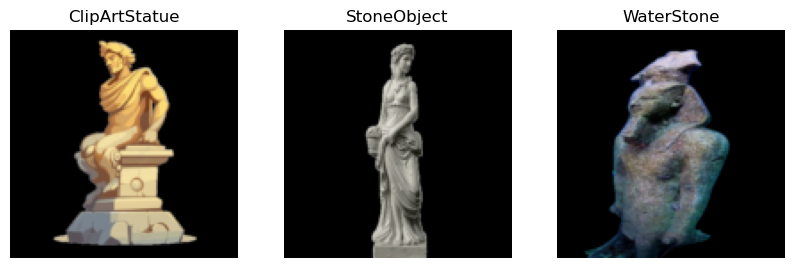

In [13]:
#creat dataloader
def collate_fn(batch):
    images = [item[0] for item in batch]
    labels = torch.tensor([item[1] for item in batch])
    return images, labels

dataloader = torch.utils.data.DataLoader(dataset, batch_size=3, shuffle=True, collate_fn=collate_fn)
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=3, shuffle=True)
#get a batch of images and labels
images, labels = next(iter(dataloader))
#define class names
class_names=dataset.classes
#plot the images
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for i in range(3):
    axes[i].imshow(images[i].permute(1, 2, 0))
    axes[i].set_title(class_names[labels[i]])
    axes[i].axis('off')
plt.show()

In [14]:
#Download Some Background image
directory = 'background'
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
google_crawler = GoogleImageCrawler(
    parser_threads=2,
    downloader_threads=4,
    storage={'root_dir': 'background'}
)

for keyword in ['Las Vegas', 'Burj al arab', 'Seychelles', 'Azores', 'Canary islands', 'Budapest', 'Castle', 'Park', "Balaton", 'Porto']:
    google_crawler.crawl(
        keyword=keyword, max_num=20, file_idx_offset='auto')

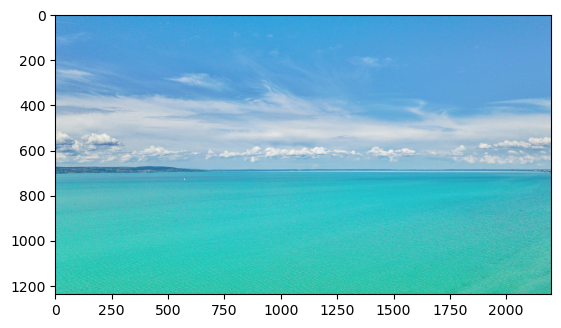

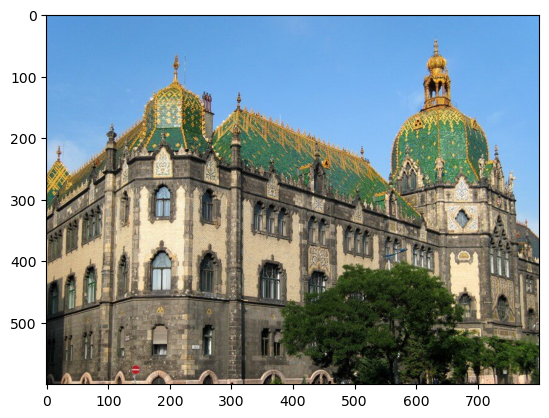

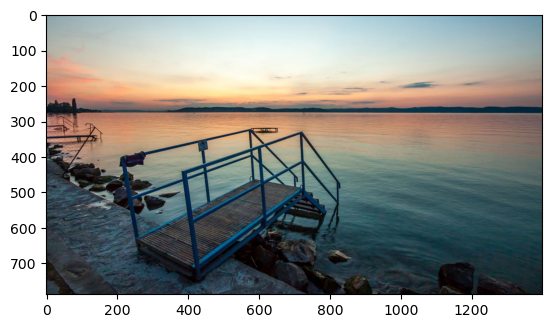

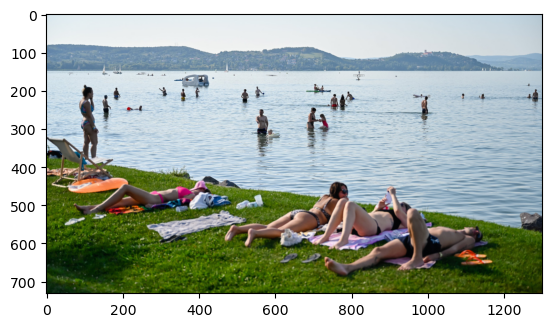

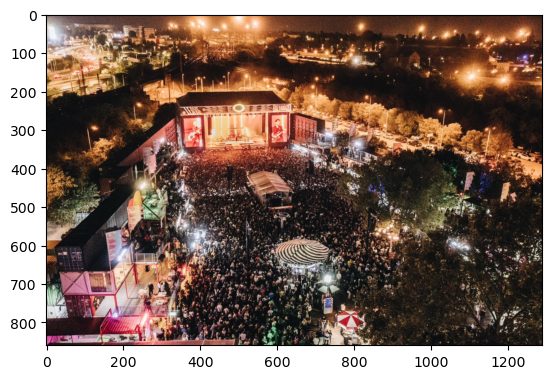

In [15]:
def display_sample_images(directory: str, ImageName: str) -> None:
    image = mpimg.imread(f"{directory}\\{ImageName}")
    plt.figure()
    plt.imshow(image)

ImageNames = os.listdir(directory)
#This is going to show 5 random pictures
for i in range(5):
    randomNumber = randrange(len(ImageNames))
    display_sample_images(directory, ImageNames[randomNumber])


Create the Dataset in YOLO format

In [27]:
def GenerateIamgesandBoundingBoxes(root_dir: str, ImageNames: list, background_dir:str, split='train', img_size = (640, 640), num_images=5000):
    #We create a folder for the New Images
   
    split_dir = os.path.join(root_dir, split)
    images_dir = os.path.join(split_dir, 'images')
    labels_dir = os.path.join(split_dir, 'labels')


    ObjectDirectory = 'Object'
    #Load the backgrounds and the objects
    background_images = os.listdir(background_dir)
    ObjectNames = os.listdir(ObjectDirectory)

    object_dirs = os.listdir('Object')
    if not object_dirs:
        raise FileNotFoundError("No object directories found in 'Object'")
   
    class_map = {object_name: i for i, object_name in enumerate(object_dirs)}
    #This is to how big the statue should be in a given bg
    size_map = {object_name: random.randint(100, 150) for object_name in object_dirs}
    

    #for i in range(num_images):
    bg_image_path = os.path.join(background_dir, random.choice(background_images))
    bg_image = Image.open(bg_image_path).convert('RGBA').resize(img_size)


        # Randomly select an object directory and ensure it's not empty
    object_dir = random.choice(object_dirs)
    print(object_dir)
    object_dir_path = os.path.join(ObjectDirectory, object_dir)
    object_images = os.listdir(object_dir_path)
    if not object_images:
            print(f"Warning: No images found in {object_dir_path}. Skipping...")
        #continue

        # Randomly select an object image
    object_image_path = random.choice(object_images)
    class_index = class_map[object_dir]
    object_size = size_map[object_dir]

    # Load and resize the object image
    object_image = Image.open(os.path.join(object_dir_path, object_image_path)).convert('RGBA').resize((object_size, object_size))

    #We get the Image Size and scale them down randomly
    w, h = StatueImage.size
    bgw, bgh = bg_image.size



In [28]:
root = "dataset"
if not os.path.exists(root):
        os.makedirs(root)
GenerateIamgesandBoundingBoxes(root, ImageNames, 'background')

StoneObject
['stoneObject.png']
